In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits, ascii
import scipy.stats
from loess.loess_2d import loess_2d
from matplotlib.patches import Circle
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import cmasher as cmr
plt.rcParams.update({'font.size': 14})

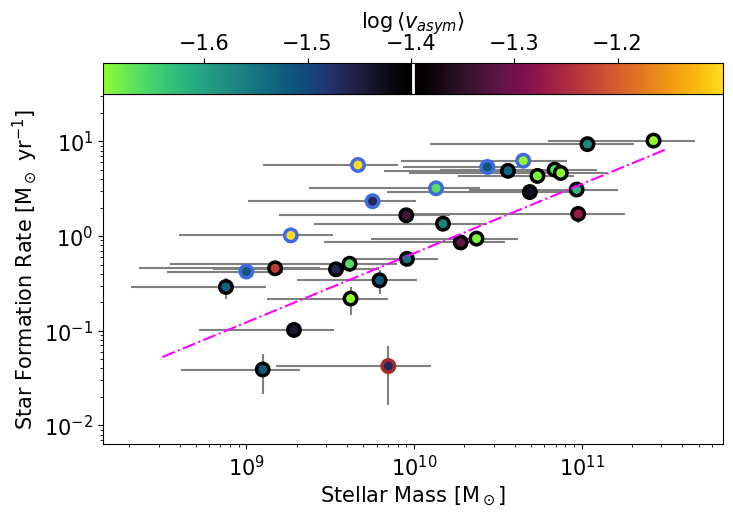

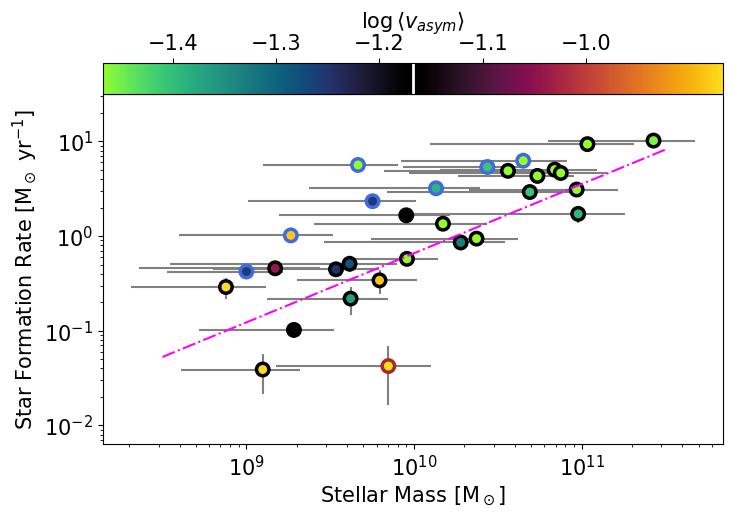

In [155]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = sample.dropna()
sample = sample[(sample["v_asym_tot"]/sample["v_asym_tot_err"])>3]
bpt = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_BPT.csv")
SF = bpt[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==1]
sample = sample[sample["MAGPIID"].isin(SF["MAGPIID"])]
SF = SF[SF["MAGPIID"].isin(sample['MAGPIID'])]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
k35 = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_k24_k35.csv")
k35 = k35[k35["MAGPIID"].isin(sample['MAGPIID'])]
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(sample["MAGPIID"])]
xx = np.logspace(8.5,11.5, 55)
MS = (xx**0.730)*(10**-7.482)
SFR = SF["SFR, dust corrected"].to_numpy()
mass = prospect["StellarMass_median"].to_numpy()
mass_err = prospect["StellarMass_16"].to_numpy()
SFR_err =SF["SFR_err"].to_numpy()
asym = sample["v_asym_tot"].to_numpy()

D_SFR = []
for x,y in zip(mass,SFR):
    if 0.5 > (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > -1:
        D_SFR.append(1) # Star Forming
    if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > 0.5:
        D_SFR.append(2) # Starbursting
    if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) < -1:
        D_SFR.append(0)
colors=[]
for i in D_SFR:
    if i==1:
        colors.append("k")
    if i==2:
        colors.append("royalblue")
    if i==0:
        colors.append("brown")
colors=np.array(colors)

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(figsize=(8,5))
p=ax.scatter(mass,SFR, zorder=2,ec=colors,s=80,linewidths=1.5, c=np.log10(asym),vmin=np.log10(0.04)-0.3,vmax=np.log10(0.04)+0.3,cmap="cmr.wildfire",lw=2.5)
ax.errorbar(mass,SFR,xerr=mass_err, yerr=SFR_err, c='gray', zorder=1, ls="")
ax.plot(xx,MS, c="magenta", ls="dashdot", label="MS (z~0.35)")
#ax.plot(xx,MS*0.1, c="magenta", ls="dashdot")
#ax.plot(xx,MS*10, c="magenta", ls="dashdot")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10**(-2.2),10**(1.5))
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [M$_\odot$ yr$^{-1}$]")
cbar = plt.colorbar(p,ax=ax, pad=0,fraction=0.09,label=r"$\log \langle v_{asym} \rangle$",location="top",ticks=[-1.6,-1.5,-1.4,-1.3,-1.2])
cbar.ax.plot([np.log10(0.04),np.log10(0.04)],[0,1],"w", lw=2)
plt.savefig("plots/SFMS_asym_10Myrs.pdf", bbox_inches="tight")

asym = k35["k35_2re"].to_numpy()
fig,ax = plt.subplots(figsize=(8,5))
p=ax.scatter(mass,SFR, zorder=2,ec=colors,s=80,linewidths=1.5, c=np.log10(asym),vmin=np.log10(0.068)-0.3,vmax=np.log10(0.068)+0.3, cmap="cmr.wildfire",lw=2.5)
ax.errorbar(mass,SFR,xerr=mass_err, yerr=SFR_err, c='gray', zorder=1, ls="")
ax.plot(xx,MS, c="magenta", ls="dashdot", label="MS (z~0.35)")
#ax.plot(xx,MS*0.1, c="magenta", ls="dashdot")
#ax.plot(xx,MS*10, c="magenta", ls="dashdot")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10**(-2.2),10**(1.5))
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [M$_\odot$ yr$^{-1}$]")
cbar = plt.colorbar(p,ax=ax, pad=0,fraction=0.09,label=r"$\log \langle v_{asym} \rangle$", location="top", ticks=[-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0])
cbar.ax.plot([np.log10(0.068),np.log10(0.068)],[0,1],"w", lw=2)
plt.savefig("plots/SFMS_asym_Ha_SAMI.pdf", bbox_inches="tight")

In [157]:
print(colors)

['k' 'k' 'royalblue' 'k' 'royalblue' 'k' 'k' 'k' 'royalblue' 'brown' 'k'
 'k' 'k' 'k' 'k' 'k' 'k' 'k' 'k' 'k' 'k' 'k' 'k' 'royalblue' 'k' 'k'
 'royalblue' 'k' 'royalblue' 'royalblue']


In [152]:
new_sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#new_sample = new_sample[new_sample["v_asym_stars"]/new_sample["v_asym_stars_err"]>1]
#new_sample = new_sample[new_sample["v_asym_gas"]/new_sample["v_asym_gas_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(new_sample["MAGPIID"])]
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(new_sample["MAGPIID"])]

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/3956745982.py:6: RuntimeWarning: divide by zero encountered in log10
  if 0.5 > (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > -1:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/3956745982.py:8: RuntimeWarning: divide by zero encountered in log10
  if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > 0.5:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/3956745982.py:10: RuntimeWarning: divide by zero encountered in log10
  if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) < -1:
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/3956745982.py:24: RuntimeWarning: divide by zero encountered in log10
  p=ax.scatter(prospect["StellarMass_median"],bpt['SFR, dust corrected'],ec=colors,c=np.log10(new_sample['v_asym_s'].to_numpy()),


107


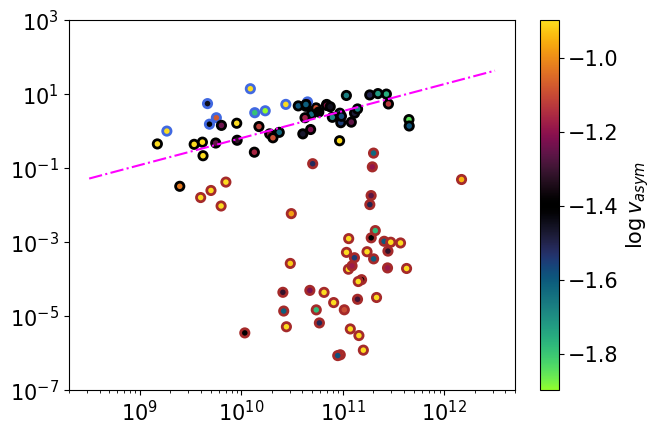

In [153]:
xx = np.logspace(8.5,12.5, 55)
MS = (xx**0.730)*(10**-7.482)

D_SFR = []
for x,y in zip(prospect["StellarMass_median"].to_numpy(),bpt["SFR, dust corrected"].to_numpy()):
    if 0.5 > (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > -1:
        D_SFR.append(1) # Star Forming
    if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) > 0.5:
        D_SFR.append(2) # Starbursting
    if (np.log10(y) - np.log10(x**(0.730)*(10**(-7.482)))) < -1:
        D_SFR.append(0)
colors=[]
for i in D_SFR:
    if i==1:
        colors.append("k")
    if i==2:
        colors.append("royalblue")
    if i==0:
        colors.append("brown")
colors=np.array(colors)
colors=np.array(colors)
print(len(bpt["SFR, dust corrected"]))
fig,ax = plt.subplots()
p=ax.scatter(prospect["StellarMass_median"],bpt['SFR, dust corrected'],ec=colors,c=np.log10(new_sample['v_asym_s'].to_numpy()),
             cmap="cmr.wildfire", vmin=np.log10(0.04)-0.5, vmax=np.log10(0.04)+0.5, lw=2)
ax.plot(xx,MS,ls="dashdot",c="magenta")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-7,1e3)
plt.colorbar(p,ax=ax,fraction=0.05,pad=0.05, label=r"$\log v_{asym}$")
plt.savefig("plots/new_SFMS.pdf",bbox_inches="tight")

In [70]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
file = file.dropna()
f = file[file["v_asym_05re"]>0.04]
f = f[f["v_asym_15re"]>0.04]
print(len(f)/len(file))
print(len(file[file["v_asym_05re"]<file["v_asym_15re"]])/len(file))

0.15217391304347827
0.6739130434782609


In [71]:
file = pd.read_csv("MAGPI_Emission_Lines/old_csv/kinemetry_sample_M1.csv")
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
file = file.dropna()
len(file[file["v_asym_15re"]>file["v_asym_05re"]])/len(file)

0.9111111111111111

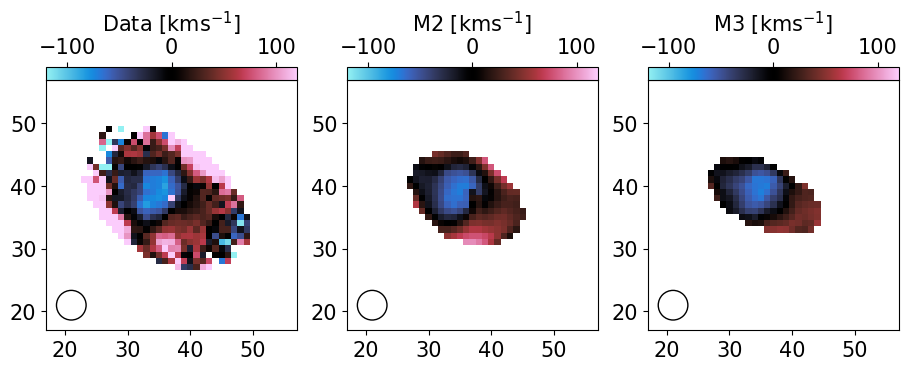

In [72]:
f = "MAGPI_Emission_Lines/MAGPI2310/plots4/MAGPI2310167176_velocity/MAGPI2310167176_z_0.2832_Ha_kinemetry.fits"
file = fits.open(f)
z = 0.2832
pix = cosmo.luminosity_distance(z).to(u.kpc).value
pix = np.radians((0.65/2)/3600)*pix
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11,4))
p1=ax1.imshow(file[2].data,vmin=-120,vmax=120,cmap="cmr.redshift")
p2=ax2.imshow(file[5].data,vmin=-120,vmax=120,cmap="cmr.redshift")
p3=ax3.imshow(file[6].data,vmin=-120,vmax=120,cmap="cmr.redshift")
for p,ax,label in zip([p1,p2,p3],[ax1,ax2,ax3],[r"Data [kms$^{-1}$]",r"M2 [kms$^{-1}$]",r"M3 [kms$^{-1}$]"]):
    plt.colorbar(p,ax=ax, label=label,pad=0.0,fraction=0.05, location="top")
#     ax.set_yticks([])
#     ax.set_xticks([])
    ax.set_xlim(17,57)
    ax.set_ylim(17,57)
    ax.add_patch(Circle(xy=(21,21),radius=pix,ec="k",fc="none"))
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/M2_M3_washout.pdf",bbox_inches="tight")
file.close()

0.1111111111111111


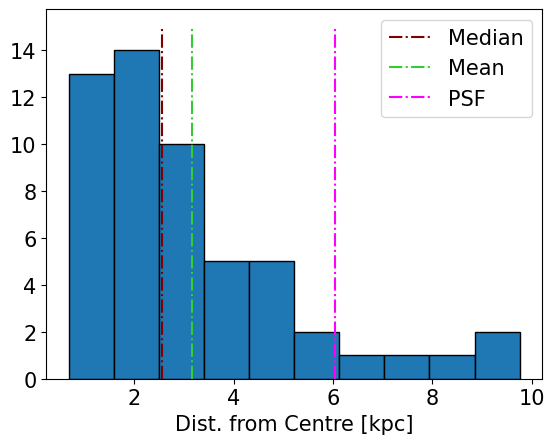

In [73]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_k24_k35.csv")
pix = np.radians((0.65)/3600)*cosmo.luminosity_distance(z=0.35).to(u.kpc).value
print(len(file[file["r_dist"]>pix])/len(file))
fig,ax = plt.subplots()
ax.hist(file["r_dist"].to_numpy(), ec="k")
ax.vlines(np.median(file["r_dist"].to_numpy()),colors="maroon", ymin=0,ymax=15,ls="dashdot", label="Median")
ax.vlines(np.mean(file["r_dist"].to_numpy()),colors="limegreen", ymin=0,ymax=15,ls="dashdot", label="Mean")
ax.vlines(pix,colors="magenta", ymin=0,ymax=15,ls="dashdot", label="PSF")
ax.set_xlabel("Dist. from Centre [kpc]")
ax.legend()
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/r_dist_distribution.pdf",bbox_inches="tight")

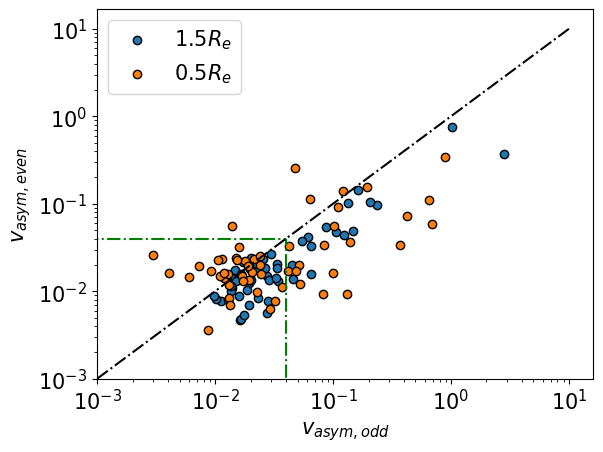

In [74]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots()
ax.scatter(file["k35_15re"]/2,file["k24_15re"]/2,ec="k",label=r"$1.5R_e$")
ax.scatter(file["k35_05re"]/2,file["k24_05re"]/2,ec="k",label=r"$0.5R_e$")
ax.vlines(0.04,ymin=10**(-3.5),ymax=0.04,colors="g",ls="dashdot")
ax.hlines(0.04,xmin=10**(-3.1),xmax=0.04,colors='g',ls="dashdot")
ax.plot(np.logspace(-3,1),np.logspace(-3,1),ls="dashdot",color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$v_{asym,even}$")
ax.set_xlabel(r"$v_{asym,odd}$")
ax.set_xlim(10**(-3.0))
ax.set_ylim(10**(-3.0))
ax.legend()
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/M2_even_contribution.pdf",bbox_inches="tight")

In [75]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#file = file.dropna()
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(file["MAGPIID"])]
file[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==2]

,Unnamed: 0,MAGPIID,v_asym_g,v_asym_g_err,v_asym_s,v_asym_s_err,PA_g,PA_s,D_PA,V_rot_g,V_rot_s
16,16,1205093221,NaN,NaN,0.233891,0.113486,NaN,47.019024,NaN,NaN,42.237106
26,26,1207128248,0.062878,0.001247,0.020229,0.002165,123.586085,165.330420,41.744335,153.331445,165.376803
33,33,1501176107,NaN,NaN,0.064345,0.006270,NaN,172.661530,NaN,NaN,112.925680
52,52,1511197198,NaN,NaN,0.014158,0.001598,NaN,93.490785,NaN,NaN,338.100781
84,84,2301290261,0.144392,0.006953,0.033957,0.003075,130.040447,313.095669,183.055221,197.991125,130.103627
86,86,2302197233,NaN,NaN,0.030569,0.002552,NaN,113.917994,NaN,NaN,145.436079
96,96,2307145281,NaN,NaN,0.054301,0.005987,NaN,97.511295,NaN,NaN,124.271097
99,99,2307228105,NaN,NaN,0.025874,0.002385,NaN,306.409152,NaN,NaN,207.712944


/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/3822425654.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(prospect["StellarMass_median"].to_numpy(),file["v_asym_tot"].to_numpy(),xerr=prospect["StellarMass_16"].to_numpy(),yerr=file["v_asym_tot_err"].to_numpy(),fmt=".k",zorder=1, c="gray")


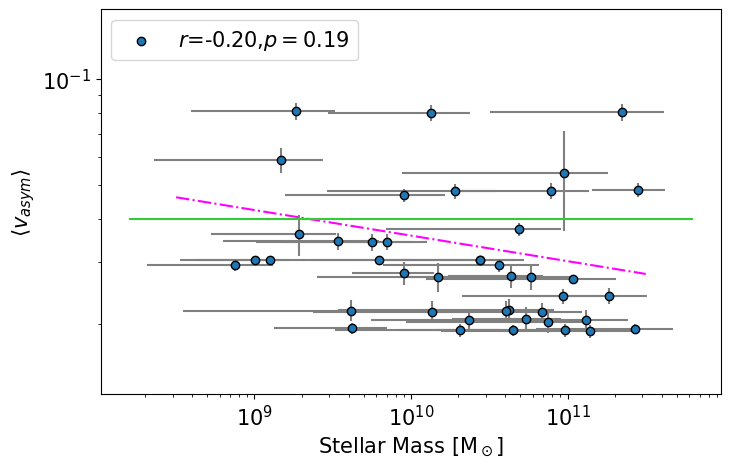

In [154]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file = file.dropna()
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect=prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]
pearson = scipy.stats.pearsonr(np.log10(prospect["StellarMass_median"].to_numpy()),np.log10(file['v_asym_tot'].to_numpy()))
fit = scipy.stats.linregress(np.log10(prospect["StellarMass_median"].to_numpy()),np.log10(file['v_asym_tot'].to_numpy()))
x = np.logspace(8.5,11.5)
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(prospect["StellarMass_median"].to_numpy(),file["v_asym_tot"].to_numpy(),ec="k",zorder=2, label=r"$r$="+f"{pearson[0]:.2f}"+r",$p=$"+f"{pearson[1]:.2f}")
ax.errorbar(prospect["StellarMass_median"].to_numpy(),file["v_asym_tot"].to_numpy(),xerr=prospect["StellarMass_16"].to_numpy(),yerr=file["v_asym_tot_err"].to_numpy(),fmt=".k",zorder=1, c="gray")
ax.plot(x,(x**fit[0])*(10**fit[1]),ls="dashdot",c="magenta")
ax.hlines(y=0.04,xmin=10**(8.2),xmax=10**(11.8),colors="limegreen")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\langle v_{asym} \rangle$")
ax.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax.legend(loc="upper left")
ax.set_ylim(10**(-1.9),10**(-0.8))
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/v_asym-stellar-mass.pdf",bbox_inches="tight")

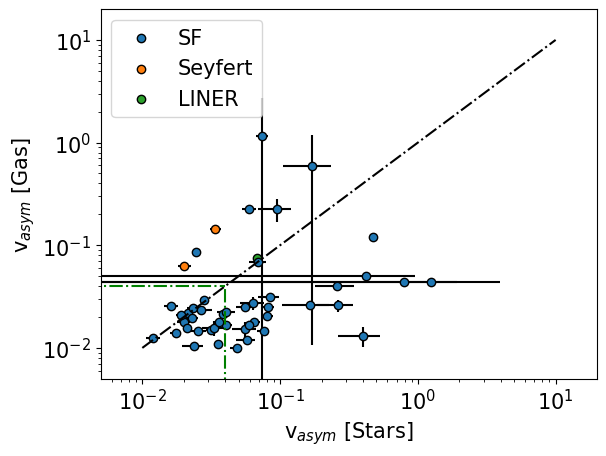

In [77]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
#file = file[file["v_asym_stars"tars"]/file["v_asym_stars_err"]>3]
#file = file[file["v_asym_stars"]/file["v_asym_stars_err"]>3]
#file = file[file["v_asym_gas"]/file["v_asym_gas_err"]>3]
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
sf = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==1]["MAGPIID"])]
sy = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==2]["MAGPIID"])]
ln = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==3]["MAGPIID"])]
comp = file[file["MAGPIID"].isin(bpt[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0]["MAGPIID"])]
fig,ax = plt.subplots()
ax.scatter(sf["v_asym_s"],sf["v_asym_g"],label="SF",ec="k",zorder=2)
ax.scatter(sy["v_asym_s"],sy["v_asym_g"],label="Seyfert",ec="k",zorder=2)
ax.errorbar(sf["v_asym_s"],sf["v_asym_g"],xerr=sf['v_asym_s_err'],yerr=sf["v_asym_g_err"],fmt='.k',zorder=1)
ax.errorbar(sy["v_asym_s"],sy["v_asym_g"],xerr=sy['v_asym_s_err'],yerr=sy["v_asym_g_err"],fmt='.k',zorder=1)
ax.scatter(ln["v_asym_s"],ln["v_asym_g"],label="LINER",ec="k")
# ax.scatter(comp["v_asym_stars"],comp["v_asym_gas"],label="Comp",ec="k",zorder=2)
# ax.errorbar(comp["v_asym_stars"],comp["v_asym_gas"],xerr=comp['v_asym_stars_err'],yerr=comp["v_asym_gas_err"],fmt='.k',zorder=1)
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2],label="Seyfert",ec="k")
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3],label="LINER")
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0],label="Comp",ec="k")
ax.plot(np.linspace(1e-2,1e1), np.linspace(1e-2,1e1), ls='dashdot', c="k")
ax.vlines(0.04,ymin=10**(-3.5),ymax=0.04,colors="g",ls="dashdot")
ax.hlines(0.04,xmin=10**(-3.1),xmax=0.04,colors='g',ls="dashdot")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"v$_{asym}$ [Stars]")
ax.set_ylabel(r"v$_{asym}$ [Gas]")
ax.set_xlim(10**(-2.3),10**(1.3))
ax.set_ylim(10**(-2.3),10**(1.3))
ax.legend()
plt.savefig("plots/SF_AGN_gas_vs_stars.pdf",bbox_inches="tight")

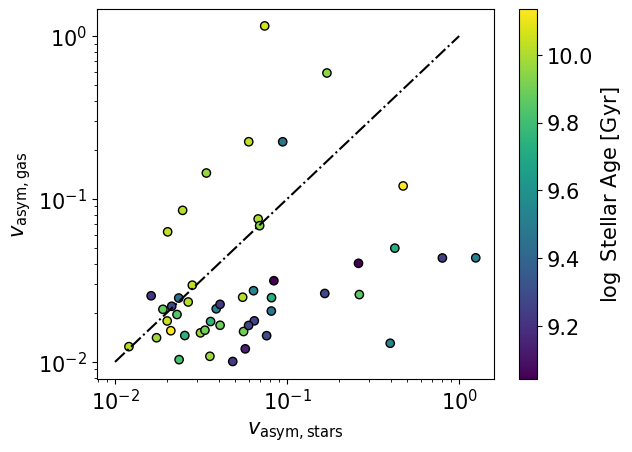

In [78]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
stellar_pop = pd.read_csv("MAGPI_stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
stellar_pop = stellar_pop[stellar_pop["MAGPIID"].isin(file["MAGPIID"])]
fig,ax = plt.subplots()
p=ax.scatter(file["v_asym_s"],file["v_asym_g"],c=stellar_pop["logage_MW_2re"],ec='k')
ax.plot(np.logspace(-2,0),np.logspace(-2,0),ls="dashdot",c="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,stars}$")
ax.set_ylabel(r"$v_{\rm asym, gas}$")
plt.colorbar(p,ax=ax,label=r"$\log$ Stellar Age [Gyr]")
plt.show()

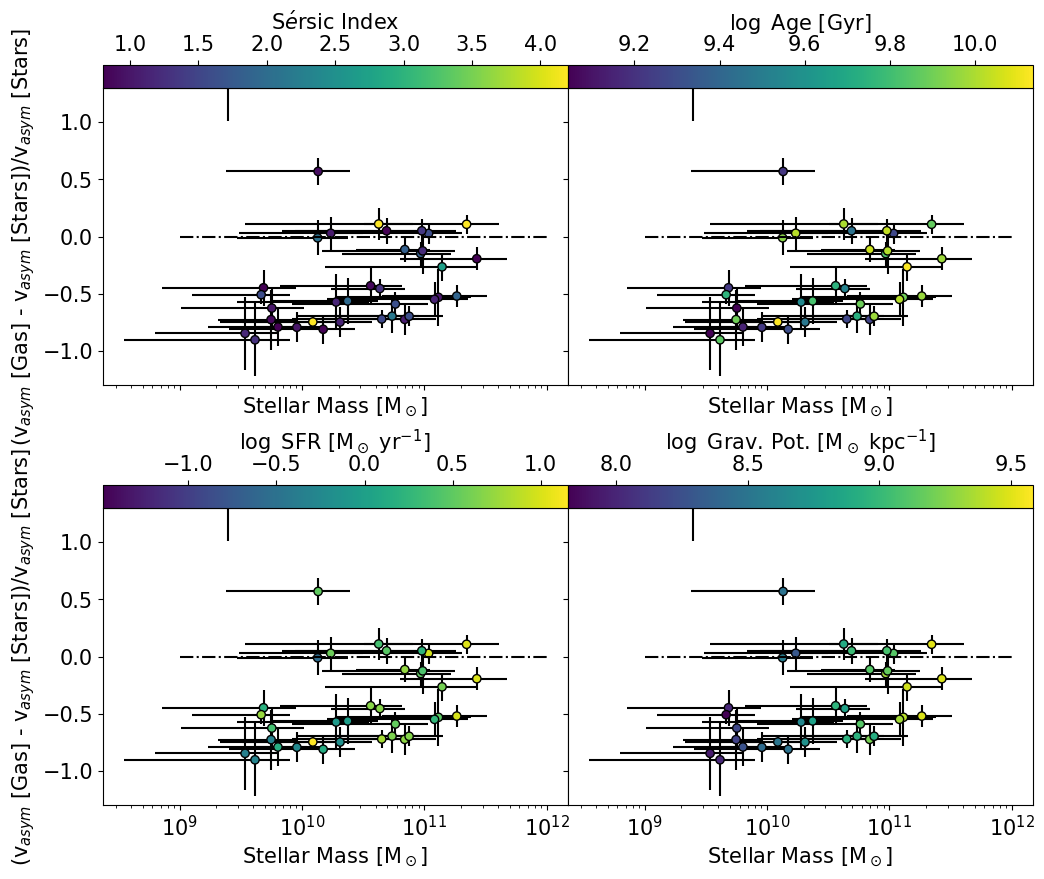

In [79]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
file = file[file["v_asym_s"]/file["v_asym_s_err"]>3]
file = file[file["v_asym_g"]>0]
d_vasym = (file["v_asym_g"] - file["v_asym_s"])/ file["v_asym_s"]
d_vasym_err = np.sqrt((file["v_asym_s_err"]/file["v_asym_s"])**2 + (file["v_asym_g_err"]/file["v_asym_g"])**2)

galfit = pd.read_csv("MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
galfit = galfit[galfit["MAGPIID"].isin(file["MAGPIID"])]
n = galfit["n"].to_numpy()

stellar_pop = pd.read_csv("MAGPI_stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
stellar_pop = stellar_pop[stellar_pop["MAGPIID"].isin(file["MAGPIID"])]
age = stellar_pop["logage_MW_2re"].to_numpy()

prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]

bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(file["MAGPIID"])]
SFR = bpt["SFR, dust corrected"].to_numpy()
pot= np.log10(prospect["StellarMass_median"].to_numpy()) - np.log10(bpt["re, kpc"])


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharey="row",sharex="col",figsize=(12,10))
p1=ax1.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=n,ec="k",zorder=2,vmin=0.8,vmax=4.2)
ax1.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p2=ax2.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=age,ec="k",zorder=2)
ax2.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p3=ax3.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=np.log10(SFR),ec="k",zorder=2)
ax3.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p4=ax4.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=pot,ec="k",zorder=2)
ax4.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
for p,ax,label in zip([p1,p2,p3,p4],[ax1,ax2,ax3,ax4], [r"S$\'{e}$rsic Index",r"$\log$ Age [Gyr]",r"$\log$ SFR [M$_\odot$ yr$^{-1}$]",
                                                        r"$\log$ Grav. Pot. [M$_\odot$ kpc$^{-1}$]"]):
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax1.set_ylabel(r"(v$_{asym}$ [Gas] - v$_{asym}$ [Stars])/v$_{asym}$ [Stars]")
    ax3.set_ylabel(r"(v$_{asym}$ [Gas] - v$_{asym}$ [Stars])/v$_{asym}$ [Stars]")
    ax.hlines(y=0,xmin=1e9,xmax=1e12,ls="dashdot",colors="k")
    ax.set_ylim(-1.3,1.3)
    plt.colorbar(p,ax=ax,label=label,location="top",pad=0)
ax1.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax2.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax3.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax4.set_xlabel(r"Stellar Mass [M$_\odot$]")
plt.subplots_adjust(wspace=0)
plt.savefig("plots/d_v_asym_age.pdf",bbox_inches="tight")

In [80]:
# f = open("MAGPI_csv/MAGPI_master_emission_lines.tbl","r")
# file = []
# for i in f:
#     file.append(i)
# f.close()
# hdr = file[4].split()
# data = []
# for i in range(5,len(file)):
#     data.append(file[i].split())
# data = np.array([list(x) for x in zip(*data)]).T
# data = pd.DataFrame(data,columns=hdr)
# data.to_csv("MAGPI_csv/MAGPI_master_emission_lines.csv",index=False)
# data = pd.read_csv("MAGPI_csv/MAGPI_master_emission_lines.csv").to_numpy()
# max_ln = []
# max_ln_err = []
# gal = []
# for i in range(len(data)):
#     if data[i,2]==-1:
#         continue
#     x = np.where(data[i]==np.max(data[i,4:]))[0][0]
#     #print(f"MAGPI{int(data[i,0]):.0f} Brightest Line is {hdr[x]}")
#     gal.append(int(data[i,0]))
#     max_ln.append(hdr[x]+'_F')
#     max_ln_err.append(hdr[x]+'_FERR')
# df = pd.DataFrame({"MAGPIID":gal,
#                    "MAX_LINE":max_ln,
#                    "MAX_LINE_ERR":max_ln_err})
# df.to_csv("MAGPI_csv/MAGPI_Emission_Max_Line.csv",index=False)

In [81]:
def clean_images(img, pa, a, b, img_err=None):
    y0, x0 = img.shape
    y0, x0 = y0 / 2, x0 / 2
    pa = pa - 90
    pa = np.radians(pa)
    for i in range(len(img[:, 0])):
        for j in range(len(img[0, :])):
            side1 = (((j - x0) * np.cos(pa)) + ((i - y0) * np.sin(pa))) ** 2 / (a ** 2)
            side2 = (((j - x0) * np.sin(pa)) - ((i - y0) * np.cos(pa))) ** 2 / (b ** 2)
            if side1 + side2 > 8:
                img[i, j] = np.nan
            if img_err is not None and abs(img_err[i, j]) < 3:
                img[i, j] = np.nan
    return img

In [82]:
# galaxy = 1207128248
# file = fits.open("MAGPI"+str(galaxy)+"_1dspec_1.5re.fits")
# data = file[1].data
# x = np.linspace(4700,9350,len(data))
# z = prospect[prospect["MAGPIID"].isin([galaxy])]["z"].to_numpy()[0]
# x = x/(1+z)
# fig,ax = plt.subplots(figsize=(14,4))
# ax.plot(x,data/np.max(data))
# ax.vlines(x=3727,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=3250,y=0.4,s=r"[OII] 3727$\AA$")
# ax.vlines(x=3730,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=3750,y=0.3,s=r"[OII] 3730$\AA$")
# ax.vlines(x=5008,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=5050,y=0.3,s=r"[OIII] 5008$\AA$")
# ax.vlines(x=4861,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=4420,y=0.4,s=r"H$\beta$ 4861$\AA$")
# ax.vlines(x=6562,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.42,s=r"H$\alpha$ 6562$\AA$")
# ax.vlines(x=6585,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.23,s=r"[NII] 6585$\AA$")
# ax.vlines(x=6718,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.34,s=r"[SII] 6718$\AA$")
# ax.vlines(x=6302,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=6800,y=0.31,s=r"[SII] 6733$\AA$")
# ax.vlines(x=6733,ymin=0,ymax=1, ls="dashdot", colors="k")
# ax.text(x=5800,y=0.4,s=r"[OI] 6733$\AA$")
# ax.set_xlim(3200,7300)
# ax.set_ylim(0.005,0.455)
# ax.set_xlabel(r"Wavelength [$\AA$]")
# ax.set_ylabel("Normalised Flux Density")
# plt.savefig("plots/spectrum.pdf",bbox_inches="tight")

In [83]:
# file=pd.read_csv("MAGPI_env_metric/MAGPI_groups.txt",skiprows=50)
# file = []
# with open("MAGPI_env_metric/MAGPI_galaxies_in_groups.txt","r") as f:
#    for i in f:
#        print(i)
#        file.append(i)
# hdr = file[38].split(",")
# data = []
# for i in range(39,len(file)):
#     data.append(file[i].split(","))
# data = np.array([list(x) for x in zip(*data)]).T
# # data = pd.DataFrame(data,columns=hdr)
# # data.to_csv("MAGPI_env_metric/MAGPI_galaxies_in_groups.csv",index=False)

In [84]:
groups = pd.read_csv("MAGPI_env_metric/MAGPI_groups.csv")
gal_in_group = pd.read_csv("MAGPI_env_metric/MAGPI_galaxies_in_groups.csv")
N_gals = np.zeros(len(gal_in_group))
BCG = np.zeros(len(gal_in_group))
GroupName = []
for i in range(len(groups)):
    for j in range(len(gal_in_group)):
        if gal_in_group['"GroupID"'].to_numpy()[j]==groups['"GroupID"'].to_numpy()[i]:
            N_gals[j] = groups['"GroupN"'].to_numpy()[i]
            GroupName.append(groups['"GroupID"'].to_numpy()[i])
        if gal_in_group['"MAGPIID"'].to_numpy()[j]==groups['"GroupBcgMAGPIID"'].to_numpy()[i]:
            BCG[j]=1
#         if gal_in_group['"MAGPIID"'].to_numpy()[j]==1523135170:
#             N_gals[j]=np.nan
#             GroupName[j]=np.nan
#             BCG[j]=np.nan
#         if gal_in_group['"MAGPIID"'].to_numpy()[j]==2305332151:
#             N_gals[j]=np.nan
#             GroupName[j]=np.nan
#             BCG[j]=np.nan
#         if gal_in_group['"MAGPIID"'].to_numpy()[j]==2304188222:
#             N_gals[j]=np.nan
#             GroupName[j]=np.nan
#             BCG[j]=np.nan
# N_gals=np.append(N_gals,[np.nan,np.nan,np.nan])
# GroupName=np.append(GroupName,[np.nan,np.nan,np.nan])
# BCG=np.append(BCG,[np.nan,np.nan,np.nan])
# ids = gal_in_group['"MAGPIID"'].to_numpy()
# ids = np.append(ids,[1523135170,2305332151,2304188222])
#
#print(len(ids),len(N_gals),len(GroupName),len(BCG))
df = pd.DataFrame({"MAGPIID":gal_in_group['"MAGPIID"'].to_numpy(),
                   "N_Gals":N_gals,
                   "BCG?":BCG==1,
                   "GroupName":GroupName})
# df.loc[len(df)]=[2304188222,np.nan,np.nan,np.nan]
# df.loc[len(df)]=[2305332151,np.nan,np.nan,np.nan]
# df.loc[len(df)]=[1523135170,np.nan,np.nan,np.nan]
df.to_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv", index=False)
df.to_csv("MAGPI_csv/kinemetry_sample_env.csv",index=False)

In [85]:
df.to_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv", index=False)
df.to_csv("MAGPI_csv/kinemetry_sample_env.csv",index=False)

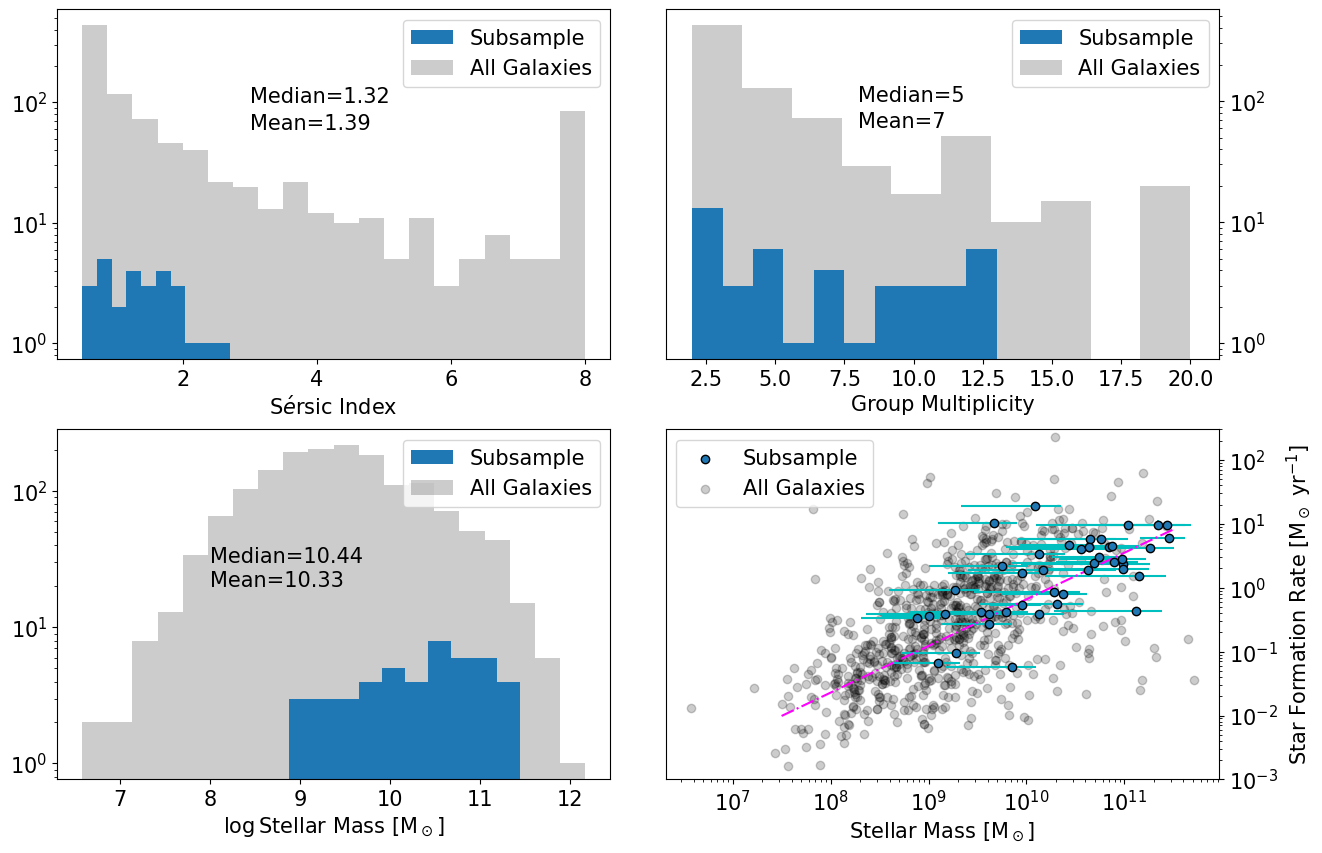

In [86]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
#sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
sample = sample.dropna()
sample = sample[sample["v_asym_tot"]/sample["v_asym_tot_err"]>3]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")

# SFMS & Mass
t = ascii.read("MAGPI_csv/MAGPI_Balmer_SFRs_onedspec.tbl")
df=pd.DataFrame({"MAGPIID":np.array(t['MAGPI_ID']),
                "SFR":np.array(t["SFR"]),
                "SFR_err":np.array(t["SFR_err"])})
df1 = df[df["MAGPIID"].isin(sample["MAGPIID"])]
df2 = df[~df["MAGPIID"].isin(sample["MAGPIID"])]
SFR = df1["SFR"].to_numpy()
SFR_err = df1["SFR_err"].to_numpy()
SFR_2 = df2["SFR"].to_numpy()
M_sol = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]["StellarMass_median"].to_numpy()
M_sol_err = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]["StellarMass_16"].to_numpy()
M_sol_2 = prospect[prospect["MAGPIID"].isin(df2["MAGPIID"])]["StellarMass_median"].to_numpy()
xx = np.logspace(7.5,11.5, 55)
MS = (xx**0.730)*(10**-7.482)

# Environment
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
N_Gals = env[env["MAGPIID"].isin(sample["MAGPIID"])]["N_Gals"]
not_N_gals = env[~env["MAGPIID"].isin(sample["MAGPIID"])]["N_Gals"]

# Sersic
file1 = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file1 = file1.dropna()
file1 = file1.drop_duplicates(["MAGPIID"])
galfit = pd.read_csv("MAGPI_csv/MAGPI_GalfitSersicCat_v0.0.csv")
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
n2 = galfit["n"]
n2 = n2[n2 > 0]
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(prospect["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(prospect["MAGPIID"])]
n = galfit["n"]
n = n[n > 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Sersic
ax1.hist(n, zorder=2, label="Subsample", bins=10)
ax1.hist(n2, label="All Galaxies", color="k", bins=20, alpha=0.2)
ax1.text(s=f"Median={np.median(n):.2f}", x=3, y=100)
ax1.text(s=f"Mean={np.mean(n):.2f}", x=3, y=60)
#ax.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"S$\'{e}$rsic Index")
ax1.legend()
# Environment
ax2.hist(N_Gals, label="Subsample", zorder=2)
#ax2.hist(N_Gals_0, zorder=2, label="No Env. Metrics")
ax2.hist(not_N_gals, label="All Galaxies", color="k", alpha=0.2, zorder=1)
ax2.set_yscale("log")
ax2.set_xlabel("Group Multiplicity")
ax2.text(s=f"Median={np.median(N_Gals):.0f}", x=8, y=100)
ax2.text(s=f"Mean={np.mean(N_Gals):.0f}", x=8, y=60)
ax2.legend()
ax2.set_xlim(1.05,21.05)
# Mass
ax3.hist(np.log10(M_sol), zorder=2, label="Subsample", bins=10)
ax3.hist(np.log10(M_sol_2), label="All Galaxies", color="k", bins=20, alpha=0.2)
ax3.text(s=f"Median={np.median(np.log10(M_sol)):.2f}", x=8, y=30)
ax3.text(s=f"Mean={np.mean(np.log10(M_sol)):.2f}", x=8, y=20)
#ax.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel(r"$\log$Stellar Mass [M$_\odot$]")
ax3.legend()
# SFMS
ax4.scatter(M_sol, SFR, zorder=3, label="Subsample", ec="k")
ax4.errorbar(M_sol, SFR, xerr=M_sol_err, yerr=SFR_err, zorder=2, fmt=".c", ls="")
ax4.scatter(M_sol_2, SFR_2, zorder=1, alpha=0.2, c="k", label="All Galaxies")
ax4.plot(xx, MS, ls="dashdot", c="magenta")
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_ylim(0.001, 300)
ax4.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax4.set_ylabel(r"Star Formation Rate [M$_\odot$ yr$^{-1}$]")
ax4.legend()
for ax in [ax2, ax4]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.savefig("plots/SFMS_Mass_Sersic_Env.pdf", bbox_inches="tight")

In [87]:
#### sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = sample.dropna()
sample = sample[sample["v_asym_tot"]/sample["v_asym_tot_err"]>3]
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
sample = sample[sample["MAGPIID"].isin(env["MAGPIID"])]
env = env[env['MAGPIID'].isin(sample["MAGPIID"])]

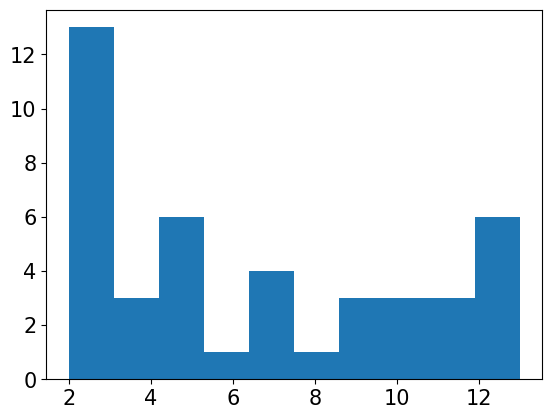

In [88]:
fig,ax = plt.subplots()
ax.hist(env["N_Gals"])
plt.savefig("plots/env_hist.pdf",bbox_inches="tight")

In [89]:
np.median(env["N_Gals"])

5.0

In [90]:
ld_sample = sample[np.array([env["N_Gals"]<=5]).T]
hd_sample = sample[np.array([env["N_Gals"]>5]).T]

In [91]:
hd_sample[hd_sample["v_asym_tot"]>0.04]

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
49,2308186140,0.062333,0.008599,0.027921,0.005741,0.081081,0.004645,0.026457,0.010614,0.032958,0.011572,0.040768,0.006159
50,2308198197,0.061296,0.008515,0.029387,0.005491,0.080665,0.004537,0.025329,0.010305,0.035558,0.011550,0.041370,0.006733
51,2308295194,0.060587,0.008798,0.028486,0.005279,0.080241,0.004253,0.025353,0.009384,0.036884,0.010315,0.041552,0.005522
52,2310167176,0.180592,0.006741,0.248004,0.025024,0.176682,0.005165,0.124930,0.007145,0.188272,0.030523,0.102778,0.005565
53,2310199196,0.180610,0.006658,0.246510,0.023809,0.177404,0.005097,0.124848,0.007921,0.190711,0.030120,0.102711,0.005772
54,2310313103,0.180229,0.006792,0.244239,0.024608,0.176644,0.005111,0.125397,0.008661,0.187579,0.031661,0.103263,0.006926


In [92]:
ld_sample[ld_sample["v_asym_tot"]>0.04]

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
0,1201302222,0.052438,0.008733,0.036753,0.008614,0.058906,0.004912,0.017834,0.010068,0.024594,0.011666,0.026974,0.007432
7,1204198199,0.071394,0.018377,0.042810,0.002963,0.054032,0.017081,0.043963,0.029053,0.023514,0.004113,0.036102,0.011121
13,1207128248,0.062469,0.003164,0.203058,0.010537,0.048133,0.002484,0.036644,0.005659,0.147293,0.018074,0.039563,0.003236
14,1207181305,0.062559,0.002795,0.203859,0.011159,0.047933,0.002266,0.036984,0.005000,0.145507,0.018053,0.039817,0.003396
15,1207197197,0.063191,0.003585,0.201798,0.010581,0.048396,0.002348,0.038029,0.005565,0.142675,0.015827,0.039929,0.003495


N_gals=4 Frac =0!
N_gals=5 Frac =0!
N_gals=6 Frac =0!
N_gals=8 Frac =0!
N_gals=9 Frac =0!
N_gals=10 Frac =0!
N_gals=11 Frac =0!
N_gals=13 Frac =0!
No Gals with N_gals=14
No Gals with N_gals=15
No Gals with N_gals=16
No Gals with N_gals=17
No Gals with N_gals=18
No Gals with N_gals=19
No Gals with N_gals=20


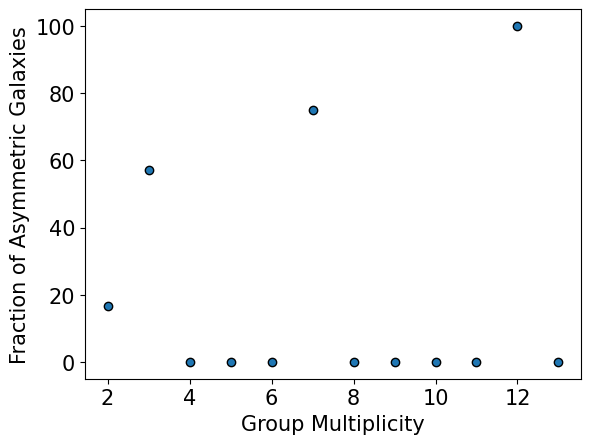

In [93]:
frac = []
n_frac= []
for i in range(2,21):
    ss = sample[np.array([env["N_Gals"]==i]).T]
    if len(ss)==0:
        print(f"No Gals with N_gals={i}")
        #frac.append(np.nan)
        #n_frac.append(0)
        continue
    if int((100*(len(ss[ss["v_asym_tot"]>0.04])/len(ss))))==0:
        print(f"N_gals={i} Frac =0!")
    frac.append(100*(len(ss[ss["v_asym_tot"]>0.04])/len(ss)))
    #n_frac.append(np.nan)
    #print("Grp. Multi={0:.0f}, {1:.1f} % Asymmetric".format(i,100*(len(ss[ss["v_asym_tot"]>0.04])/len(ss))))
frac = np.array(frac)
# frac[frac==0]=0
fig,ax = plt.subplots()
ax.scatter(np.arange(2,14,1),frac,ec="k")
#ax.scatter(np.arange(2,14,1),n_frac,ec="k",label='Not in Sample')
ax.set_xlabel("Group Multiplicity")
ax.set_ylabel("Fraction of Asymmetric Galaxies")
plt.savefig("plots/asym_frac.pdf",bbox_inches="tight")

In [94]:
ss=env[env["MAGPIID"].isin(sample["MAGPIID"])]

In [95]:
vv = sample[sample["MAGPIID"].isin(ss[ss["BCG?"]]["MAGPIID"])]
cen = vv[vv["v_asym_tot"]>0.04]
#env[env["MAGPIID"].isin(vv["MAGPIID"])]
vv

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
0,1201302222,0.052438,0.008733,0.036753,0.008614,0.058906,0.004912,0.017834,0.010068,0.024594,0.011666,0.026974,0.007432
1,1202197197,0.025026,0.000912,0.039011,0.001661,0.026973,0.000603,0.016316,0.001855,0.018562,0.002449,0.011326,0.000730
7,1204198199,0.071394,0.018377,0.042810,0.002963,0.054032,0.017081,0.043963,0.029053,0.023514,0.004113,0.036102,0.011121
9,1205197197,0.014292,0.004003,0.062534,0.011532,0.027510,0.002218,0.006507,0.003829,0.097772,0.019851,0.031857,0.003845
15,1207197197,0.063191,0.003585,0.201798,0.010581,0.048396,0.002348,0.038029,0.005565,0.142675,0.015827,0.039929,0.003495
17,1209197197,0.031908,0.004187,0.015027,0.003285,0.024061,0.001233,0.005885,0.003175,0.025045,0.004665,0.015006,0.001450
31,1528197197,0.018609,0.001115,0.024849,0.002254,0.019344,0.000620,0.006584,0.002184,0.016857,0.002650,0.010845,0.000780
39,2301109255,0.021283,0.003236,0.029229,0.005877,0.021681,0.001557,0.013458,0.003318,0.014992,0.007393,0.012840,0.001764
43,2303197196,0.016169,0.002496,0.026283,0.003259,0.020230,0.001373,0.015247,0.004764,0.023170,0.003708,0.017441,0.001819
44,2304104201,0.010899,0.001515,0.018133,0.002345,0.019185,0.000716,0.007691,0.002412,0.010294,0.003403,0.009422,0.001041


In [96]:
vv = sample[sample["MAGPIID"].isin(ss[~ss["BCG?"]]["MAGPIID"])]
sat = vv[vv["v_asym_tot"]>0.04]
vv

,MAGPIID,v_asym_05re,v_asym_05re_err,v_asym_15re,v_asym_15re_err,v_asym_tot,v_asym_tot_err,k51_05re,k51_05re_err,k51_15re,k51_15re_err,k51_tot,k51_tot_err
2,1203076068,0.017930,0.001453,0.048965,0.003120,0.030413,0.000779,0.003844,0.001232,0.017953,0.003959,0.009781,0.001142
3,1203152196,0.017958,0.001384,0.048891,0.003538,0.030519,0.000771,0.003831,0.001125,0.017677,0.004183,0.009880,0.001069
4,1203247089,0.018086,0.001351,0.048737,0.003397,0.030418,0.000732,0.003793,0.001287,0.017359,0.003979,0.009632,0.000933
5,1203287367,0.018240,0.001260,0.049331,0.003294,0.030484,0.000813,0.003877,0.001037,0.018082,0.003453,0.009798,0.001080
6,1203303373,0.018100,0.001461,0.048524,0.003433,0.030544,0.000704,0.003939,0.001160,0.016949,0.003940,0.010001,0.001037
8,1205196165,0.015010,0.003749,0.065276,0.011301,0.028039,0.002101,0.006797,0.003597,0.100465,0.020030,0.032080,0.003438
10,1206151090,0.030092,0.003229,0.022409,0.002840,0.034264,0.001888,0.008139,0.003439,0.020732,0.003739,0.009041,0.002015
11,1206243216,0.030417,0.003001,0.022009,0.003514,0.034297,0.001809,0.008452,0.003255,0.020510,0.004329,0.009073,0.001778
12,1206322202,0.030383,0.003122,0.022890,0.002832,0.034491,0.001867,0.008291,0.003557,0.021337,0.003869,0.009128,0.002019
13,1207128248,0.062469,0.003164,0.203058,0.010537,0.048133,0.002484,0.036644,0.005659,0.147293,0.018074,0.039563,0.003236


In [97]:
bpt = pd.read_csv('/Volumes/DS/MAGPI/MAGPI_Emission_Lines/kinemetry_sample_BPT.csv')
bpt = bpt[bpt["MAGPIID"].isin(ss["MAGPIID"])]

In [98]:
bpt[bpt["MAGPIID"].isin(cen["MAGPIID"])]

,MAGPIID,Ha,Ha_err,Hb,[OI]6302,[OIII]5008,[NII]6585,[SII]6718,"type(sf+AGN=0, sf=1, sy=2, ln=3)","type(sf=1, sy=2, ln=3) SII","SFR, dust corrected",SFR_err,"re, arcsec","re, kpc"
0,1201302222,19010.347445,1.796036e-17,5577.775648,363.602065,15311.362648,789.004158,3620.363398,1.0,1.0,0.456965,0.029455,0.813,31.484996
7,1204198199,75914.608871,1.796300e-16,24240.748795,179.964507,7921.959760,31948.187044,8549.591163,1.0,1.0,1.716172,0.333187,1.990,81.959078
15,1207197197,104901.596090,2.162297e-16,23118.046138,914.851080,23337.630361,70177.096339,10708.083412,0.0,1.0,5.515802,0.415625,1.756,73.621939
50,2308198197,54111.678195,8.598661e-16,7124.373775,1384.074728,7644.786326,33808.337200,9858.709770,0.0,1.0,10.511373,1.986254,1.508,69.309500
53,2310199196,124848.936484,4.141620e-16,26560.470581,5025.252167,23491.739819,69909.743465,31737.059174,0.0,1.0,5.335764,0.599165,2.213,80.493163


In [99]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = sample[sample["v_asym_tot"]/sample["v_asym_tot_err"]>3]
ss = env[env["MAGPIID"].isin(sample["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(ss["MAGPIID"])]

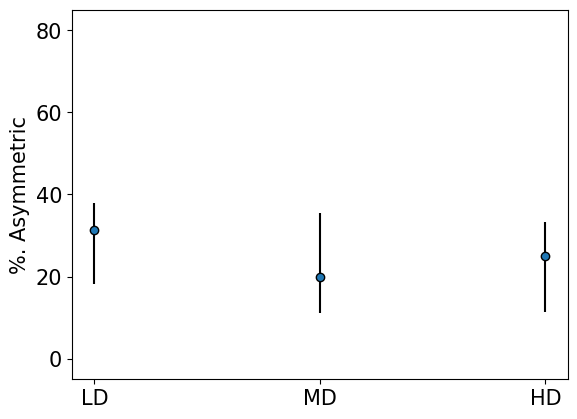

In [100]:
# E. Cameron's, 2011 Bayesian estimation of binomial errors.
def binomial_errors(n, k, c=0.683):
    import scipy.stats.distributions as dist
    p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
    p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)
    lower   = k/n - p_lower
    upper   = p_upper - k/n
    return np.array([upper, lower])
bins = np.linspace(4,14,3)
ld = []
md = []
hd = []
for i in range(len(ss["N_Gals"].to_numpy())):
    if ss["N_Gals"].to_numpy()[i]<=bins[0]:
        ld.append(ss["MAGPIID"].to_numpy()[i])
    if bins[0]<ss["N_Gals"].to_numpy()[i]<=bins[1]:
        md.append(ss["MAGPIID"].to_numpy()[i])
    if bins[1]<ss["N_Gals"].to_numpy()[i]<=bins[2]:
        hd.append(ss["MAGPIID"].to_numpy()[i])
ld_sample = sample[sample["MAGPIID"].isin(ld)]
md_sample = sample[sample["MAGPIID"].isin(md)]
hd_sample = sample[sample["MAGPIID"].isin(hd)]
frac = []
scatter = []
for i in [ld_sample,md_sample,hd_sample]:
    frac.append(len(i[i["v_asym_tot"] > 0.04])/len(i))
    scatter.append(binomial_errors(n=len(i),k=len(i[i["v_asym_tot"] > 0.04])))
scatter = np.array(scatter)
scatter = np.reshape(scatter,(2,3))*100
frac = np.array(frac)
frac = frac*100
fig,ax = plt.subplots()
#ax.hist(frac,ec="k",zorder=2)
ax.scatter(np.array(["LD","MD","HD"]),frac,zorder=2,ec="k")
ax.errorbar(np.array(["LD","MD","HD"]),frac,yerr=scatter,fmt=".k",zorder=1)
#ax.set_xlabel("Group Multi.")
ax.set_ylabel("%. Asymmetric")
ax.set_ylim(-5,85)
#ax.set_xlim(2.95,14.95)
plt.savefig("plots/asym_frac.pdf",bbox_inches="tight")

In [101]:
scatter

array([[13.16630808,  8.95413058, 13.69757634],
       [ 6.55483621, 15.55807817,  8.31687394]])

In [102]:
cen = ss[ss["BCG?"]]
sat = ss[~ss["BCG?"]]

In [103]:
v = sample[sample["MAGPIID"].isin(cen["MAGPIID"])]
vv = v[v["v_asym_05re"]<v["v_asym_15re"]]
v_c = v[v["v_asym_tot"]>0.04]
a_cen = cen[np.array(~v["MAGPIID"].isin(v_c["MAGPIID"]))]
a = len(cen[np.array(~v["MAGPIID"].isin(v_c["MAGPIID"]))])
b = len(cen)
err = binomial_errors(b,a)
print(f"{a:.0f},{b:.0f},{a/b:.2f}+{err[0]:.2f}-{err[1]:.2f}")

8,13,0.62+0.11-0.14


In [104]:
v = sample[sample["MAGPIID"].isin(sat["MAGPIID"])]
vv = v[v["v_asym_05re"]<v["v_asym_15re"]]
v_s = v[v["v_asym_tot"]>0.04]
a_sat= sat[np.array(v["MAGPIID"].isin(v_s["MAGPIID"]))]
a = len(sat[np.array(v["MAGPIID"].isin(v_s["MAGPIID"]))])
b = len(sat)
err = binomial_errors(b,a)
print(f"{a:.0f},{b:.0f},{a/b:.2f}+{err[0]:.2f}-{err[1]:.2f}")

6,30,0.20+0.09-0.05


In [105]:
print(len(a_sat[a_sat["N_Gals"]>4]))
print(len(a_sat))

4
6


In [106]:
a = 4
b = 6
err = binomial_errors(b,a)
print(f"{a:.0f},{b:.0f},{a/b:.2f}+{err[0]:.2f}-{err[1]:.2f}")

4,6,0.67+0.13-0.21


['-84', '-42', '-0', '42', '84', '125', '167', '209', '251']


/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/896473661.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(aa)
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/896473661.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(bb)


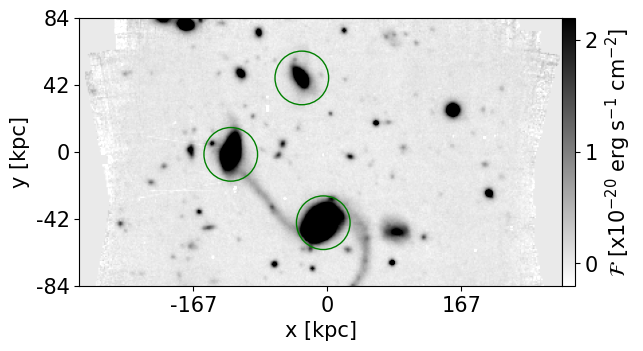

In [185]:
DL = cosmo.luminosity_distance(0.32).to(u.kpc).value
pix = np.degrees(100*3600)/DL
with fits.open("MAGPI_mini-images/MAGPI1207_CollapsedImage.fits") as file:
    img = file[1].data
    dq = file[2].data

import matplotlib.colors as cm
cmap = plt.get_cmap("gray_r")
cmap.set_bad(color="white")
fig,ax = plt.subplots()
p=ax.imshow(img,origin="lower",cmap=cmap,vmin=-0.2,vmax=2.2)
#ax.add_patch(Circle(xy=(pix, pix), radius=pix, fc="none", ec="green"))
#ax.plot([100,100+pix],[175,175],c="green")
ax.add_patch(Circle(xy=(197, 197), radius=20, fc="none", ec="green"))
ax.add_patch(Circle(xy=(128, 248), radius=20, fc="none", ec="green"))
ax.add_patch(Circle(xy=(181, 305), radius=20, fc="none", ec="green"))
ax.set_xlim(15,375)
ax.set_ylim(150,350)
a = ax.get_xticks()
b = ax.get_yticks()
a = DL*np.radians((a*0.2)/3600)
b = DL*np.radians((b*0.2)/3600)
#x0 = DL*np.radians((x0*0.2)/3600)
a = a - np.median(a)
b = b - 335
aa = [str(f"{ii:.0f}") for ii in a]
bb = [str(f"{ii:.0f}") for ii in b]
print(bb)
bb[2]="0"
ax.set_xticklabels(aa)
ax.set_yticklabels(bb)
ax.set_xlabel("x [kpc]")
ax.set_ylabel("y [kpc]")
# ax.set_xticks([])
# ax.set_yticks([])
plt.colorbar(p,ax=ax,label=r"$\mathcal{F}$ [x10$^{-20}$ erg s$^{-1}$ cm$^{-2}$]",pad=0,fraction=0.027,ticks=[0,1,2,3,4,5])
plt.savefig("plots/MAGPI1207_field.pdf",bbox_inches="tight")

In [108]:
# E. Cameron's, 2011 Bayesian estimation of binomial errors.
def binomial_errors(n, k, c=0.683):
    import scipy.stats.distributions as dist
    p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
    p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)
    lower   = [k/n - p_lower]
    upper   = [p_upper - k/n]
    return np.array([upper, lower])

In [109]:
cen_err = binomial_errors(n=len(ss),k=len(cen))
sat_err = binomial_errors(n=len(ss),k=len(sat))

In [110]:
binomial_errors(12,4)*100

array([[15.16182223],
       [10.33549367]])

In [111]:
ss

,MAGPIID,N_Gals,BCG?,GroupName
15,1201302222,2.0,True,"""1201005"""
28,1202197197,2.0,True,"""1202004"""
34,1203303373,7.0,False,"""1203001"""
39,1203076068,10.0,False,"""1203002"""
45,1203247089,10.0,False,"""1203002"""
46,1203287367,10.0,False,"""1203002"""
48,1203152196,4.0,False,"""1203003"""
56,1204198199,3.0,True,"""1204001"""
73,1205196165,5.0,False,"""1205002"""
74,1205197197,5.0,True,"""1205002"""


In [112]:
cen

,MAGPIID,N_Gals,BCG?,GroupName
15,1201302222,2.0,True,"""1201005"""
28,1202197197,2.0,True,"""1202004"""
56,1204198199,3.0,True,"""1204001"""
74,1205197197,5.0,True,"""1205002"""
135,1207197197,3.0,True,"""1207005"""
181,1209197197,5.0,True,"""1209002"""
464,1528197197,5.0,True,"""1528004"""
592,2301109255,2.0,True,"""2301001"""
647,2303197196,2.0,True,"""2303005"""
662,2304196198,3.0,True,"""2304001"""


In [113]:
sat

,MAGPIID,N_Gals,BCG?,GroupName
34,1203303373,7.0,False,"""1203001"""
39,1203076068,10.0,False,"""1203002"""
45,1203247089,10.0,False,"""1203002"""
46,1203287367,10.0,False,"""1203002"""
48,1203152196,4.0,False,"""1203003"""
73,1205196165,5.0,False,"""1205002"""
90,1206151090,11.0,False,"""1206004"""
95,1206243216,11.0,False,"""1206004"""
98,1206322202,11.0,False,"""1206004"""
133,1207128248,3.0,False,"""1207005"""


/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/1127048850.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sy = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2]
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/1127048850.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ln = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3]
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/1127048850.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sf = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==1]
/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/1127048850.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  comp = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0]


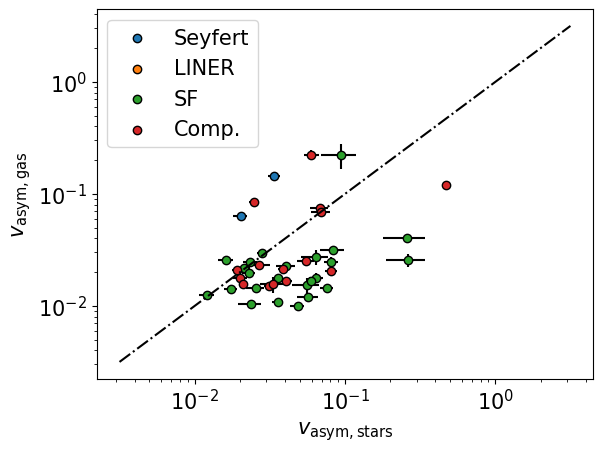

In [114]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
file = file[file["v_asym_s"]/file["v_asym_s_err"]>3]
file = file[file["v_asym_g"]/file["v_asym_g_err"]>3]
bpt = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
sy = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2]
ln = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3]
sf = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==1]
comp = file[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0]
fig,ax = plt.subplots()
for df,lab in zip([sy,ln,sf,comp],["Seyfert","LINER","SF","Comp."]):
    ax.scatter(df["v_asym_s"],df["v_asym_g"],ec="k",zorder=2,label=lab)
    ax.errorbar(df["v_asym_s"],df["v_asym_g"],xerr=df["v_asym_s_err"],yerr=df["v_asym_g_err"],fmt=".k",zorder=1)
ax.plot(np.logspace(-2.5,0.5),np.logspace(-2.5,0.5),ls='dashdot',color='k')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$v_{\rm asym,stars}$")
ax.set_ylabel(r"$v_{\rm asym,gas}$")
ax.legend()
plt.savefig("plots/SF_AGN_gas_vs_stars.pdf",bbox_inches="tight")

In [115]:
age = pd.read_csv("MAGPI_stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
file = file.dropna()
file= file[file["v_asym_g"]/file["v_asym_g_err"]>3]
age = age[age["MAGPIID"].isin(file["MAGPIID"])]
file = file[file["MAGPIID"].isin(age["MAGPIID"])]
ageLW = age["logage_LW_2re"].to_numpy()
frac_last_Gyr = age["fraction_last_Gyr_LW_2re"].to_numpy()
metal = age["metallicity_LW_2re"].to_numpy()
file["d_asym"] = np.array(file["v_asym_g"].to_numpy() - file["v_asym_s"].to_numpy())/(file["v_asym_s"].to_numpy())
file["d_asym_err"] = np.array(np.sqrt((file["v_asym_g_err"]/file["v_asym_g"])**2+(file["v_asym_s_err"]/file["v_asym_s"])**2))
#d_asym_err = np.sqrt((d_asym_err/d_asym)**2 - (file["v_asym_s_err"]/file["v_asym_s"])**2)

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_3562/2024017161.py:10: RuntimeWarning: divide by zero encountered in divide
  file["d_asym"] = np.array(file["v_asym_g"].to_numpy() - file["v_asym_s"].to_numpy())/(file["v_asym_s"].to_numpy())


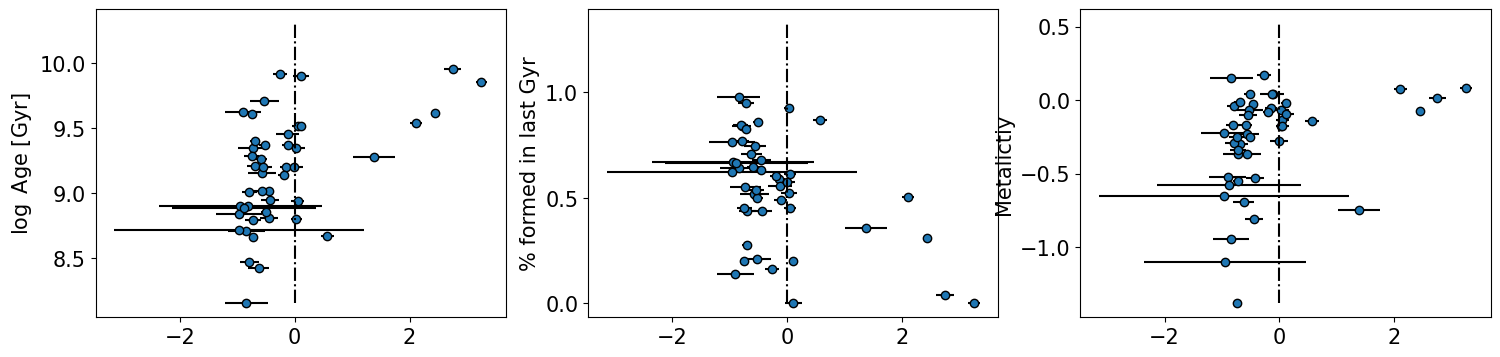

In [116]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
ax1.scatter(file["d_asym"],ageLW,ec='k',zorder=2)
ax1.errorbar(file["d_asym"],ageLW,xerr=file["d_asym_err"],fmt=".k",zorder=1)
ax2.scatter(file["d_asym"],frac_last_Gyr,ec='k',zorder=2)
ax2.errorbar(file["d_asym"],frac_last_Gyr,xerr=file["d_asym_err"],fmt=".k",zorder=1)
ax3.scatter(file["d_asym"],metal,ec='k',zorder=2)
ax3.errorbar(file["d_asym"],metal,xerr=file["d_asym_err"],fmt=".k",zorder=1)
for ax,arr in zip([ax1,ax2,ax3],[ageLW,frac_last_Gyr,metal]):
    ax.vlines(x=0,ymin=np.nanmin(arr),ymax=np.nanmax(arr)+0.35,ls="dashdot",colors="k")
    #ax.set_xlim(-5.3,5.3)
    # ax.text(x=-2.8,y=np.nanmax(arr)+0.5,s="Star Asym Dom.")
    # ax.text(x=0.8,y=np.nanmax(arr)+0.5,s="Gas Asym Dom.")
ax1.set_ylabel(r"$\log$ Age [Gyr]")
ax2.set_ylabel(r"% formed in last Gyr")
ax3.set_ylabel(r"Metalictiy")
ax2.yaxis.set_ticks([0,0.5,1])
#ax2.yaxis.tick_right()
plt.savefig("plots/d_asym.pdf",bbox_inches="tight")

In [117]:
sf[sf["v_asym_g"]>sf["v_asym_s"]]

,Unnamed: 0,MAGPIID,v_asym_g,v_asym_g_err,v_asym_s,v_asym_s_err,PA_g,PA_s,D_PA,V_rot_g,V_rot_s
4,4,1202197197,0.021959,0.000231,0.021354,0.001902,143.275431,142.602625,0.672806,216.363411,233.777779
15,15,1204198199,0.029581,0.002337,0.028136,0.002012,299.669297,334.905051,35.235754,225.285706,207.731970
34,34,1501178229,0.224440,0.057311,0.094306,0.024770,216.929848,120.844158,96.085690,24.923503,27.104141
42,42,1503208231,0.024664,0.000729,0.023465,0.002515,344.351603,340.746113,3.605490,170.090333,159.404408
49,49,1508197198,0.012408,0.001128,0.012048,0.001355,197.903053,197.935383,0.032330,263.045436,246.502820
79,79,2301109255,0.025464,0.000487,0.016219,0.001869,115.394394,296.233527,180.839133,177.151813,168.098357


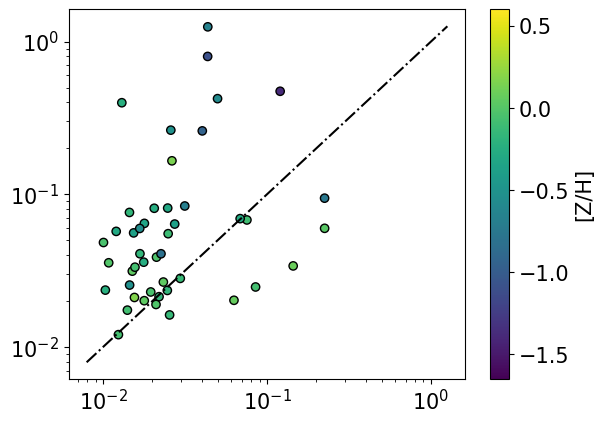

In [118]:
fig,ax=plt.subplots()
p=ax.scatter(file["v_asym_g"],file["v_asym_s"],ec="k",c=metal,vmin=-1.65,vmax=0.6)
ax.plot(np.logspace(-2.1,0.1),np.logspace(-2.1,0.1),ls="dashdot",color="k")
ax.set_xscale("log")
ax.set_yscale("log")
plt.colorbar(p,ax=ax,label='[Z/H]')
plt.show()

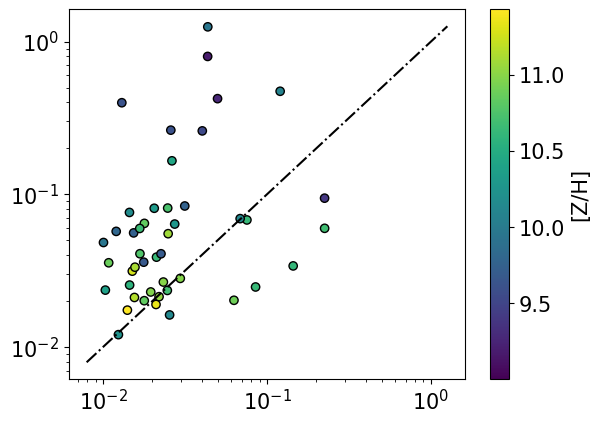

In [119]:
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]
mass = np.log10(prospect["StellarMass_median"].to_numpy())
fig,ax=plt.subplots()
p=ax.scatter(file["v_asym_g"],file["v_asym_s"],ec="k",c=mass)
ax.plot(np.logspace(-2.1,0.1),np.logspace(-2.1,0.1),ls="dashdot",color="k")
ax.set_xscale("log")
ax.set_yscale("log")
plt.colorbar(p,ax=ax,label='[Z/H]')
plt.show()

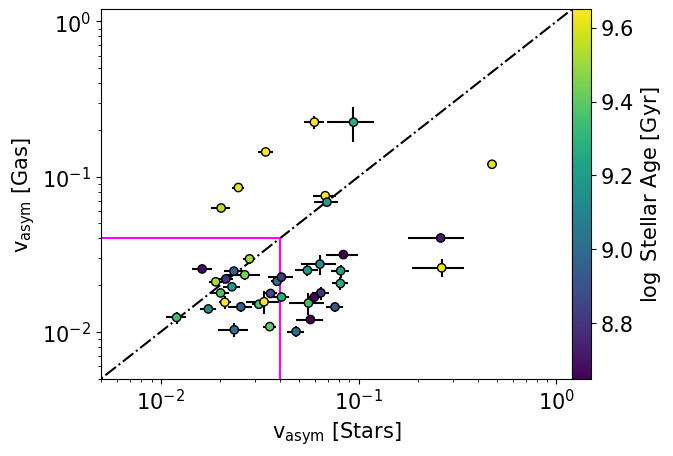

In [120]:
file = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")
ssp = pd.read_csv("MAGPI_stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
file = file[file["v_asym_s"]/file["v_asym_s_err"]>3]
file = file[file["v_asym_g"]<1]
ssp = ssp[ssp["MAGPIID"].isin(file["MAGPIID"])]

fig,ax=plt.subplots()
p=ax.scatter(file["v_asym_s"],file["v_asym_g"],ec="k",c=ssp["logage_LW_2re"],zorder=2,vmin=8.65,vmax=9.65)
ax.errorbar(file["v_asym_s"],file["v_asym_g"],xerr=file["v_asym_s_err"],yerr=file["v_asym_g_err"],fmt=".k",zorder=1)
ax.plot(np.logspace(-3,2),np.logspace(-3,2),ls="dashdot",color="k",zorder=1)
ax.hlines(y=0.04,xmin=1e-3,xmax=0.04,color="magenta",zorder=1)
ax.vlines(x=0.04,ymin=1e-3,ymax=0.04,color="magenta",zorder=1)
plt.colorbar(p,ax=ax,label=r"$\log$ Stellar Age [Gyr]",fraction=0.05,pad=0)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"v$_{\rm asym}$ [Stars]")
ax.set_ylabel(r"v$_{\rm asym}$ [Gas]")
ax.set_xlim(0.005,1.2)
ax.set_ylim(0.005,1.2)
plt.savefig("plots/v_asym_stars_gas.pdf",bbox_inches="tight")

In [169]:
f = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
f = f.dropna()
f = f[f["v_asym_tot"]/f["v_asym_tot_err"]>3]
env = pd.read_csv("MAGPI_csv/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(f["MAGPIID"])]
#f = f[f["MAGPIID"].isin(env["MAGPIID"])]
bpt = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(f["MAGPIID"])]
prospect = pd.read_csv("MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(f["MAGPIID"])]
env = pd.read_csv("MAGPI_csv/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(f["MAGPIID"])]
df = pd.DataFrame({"MAGPIID":f["MAGPIID"],
                   "z":prospect["z"].to_numpy(),
                  "StellarMass":prospect["StellarMass_median"].to_numpy()*1e-10,
                  "log L_ha x10**-41":bpt["SFR, dust corrected"]*10**(-0.27),
                  "Ionisation Source":bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"].to_numpy(),
                  #"Group N":env["N_Gals"].to_numpy(),
                  #"Cen":env["BCG?"].to_numpy(),
                   "Asymmetric?":f["v_asym_tot"]>0.04,
                   "AsymmetricOutskirst?":f["v_asym_15re"]>f["v_asym_05re"]
                  })
df.to_csv("plots/sample_prop.csv",index=False)

In [122]:
4for i in range(len(f)):
    try:
        print(i)
        print(f["MAGPIID"].to_numpy()[i],env["MAGPIID"].to_numpy()[i])
    except IndexError:
        print(f["MAGPIID"].to_numpy()[i])

0
1201302222 1201302222
1
1202197197 1202197197
2
1203076068 1203303373
3
1203152196 1203076068
4
1203247089 1203247089
5
1203287367 1203287367
6
1203303373 1203152196
7
1204198199 1204198199
8
1205196165 1205196165
9
1205197197 1205197197
10
1206151090 1206151090
11
1206243216 1206243216
12
1206322202 1206322202
13
1207128248 1207128248
14
1207181305 1207181305
15
1207197197 1207197197
16
1209131247 1209131247
17
1209197197 1209197197
18
1503208231 1503208231
19
1506106169 1506106169
20
1506279269 1506279269
21
1506325220 1506325220
22
1511160258 1511160258
23
1511283231 1511283231
24
1523135170 1528197197
25
1528197197 1528310241
26
1528310241 1534194077
27
1534194077 1534282147
28
1534282147 2301064121
29
2301064121 2301109255
30
2301109255 2301269327
31
2301269327 2301288271
32
2301288271 2301290261
33
2301290261 2303197196
34
2303197196 2304196198
35
2304104201 2304279199
36
2304188222 2304104201
37
2304196198 2308186140
38
2304279199 2308198197
39
2305332151 2308295194
40
2308186

In [123]:
from astropy.io import ascii
t = ascii.read("MAGPI_csv/MAGPI_Balmer_SFRs_onedspec.tbl")


In [124]:
np.log10(5.5e-42)

-41.25963731050576

In [125]:
10**(-41.27)

5.3703179637024885e-42

In [126]:
M1 = pd.read_csv("MAGPI_Emission_Lines/old_csv/kinemetry_sample_M1.csv")
M2 = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
M3 = pd.read_csv("MAGPI_Emission_Lines/old_csv/kinemetry_sample_M3.csv")

a = len(M1[M1["k51_15re"]>M1["k51_re"]])
b = len(M1)
err = binomial_errors(b,a)
print(f"{a/b:.2f}+{err[0][0]:.2f}-{err[1][0]:.2f}")

0.82+0.04-0.06


In [127]:
len(sample[sample["v_asym_15re"]>sample["v_asym_05re"]])

28

In [128]:
binomial_errors(46,28)

array([[0.06603166],
       [0.07513046]])

In [129]:
M1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MAGPIID          55 non-null     int64  
 1   v_asym_05re      55 non-null     float64
 2   v_asym_05re_err  55 non-null     float64
 3   v_asym_15re      48 non-null     float64
 4   v_asym_15re_err  48 non-null     float64
 5   v_asym_tot       55 non-null     float64
 6   v_asym_tot_err   55 non-null     float64
 7   k51_re           55 non-null     float64
 8   k51_re_err       55 non-null     float64
 9   k51_15re         48 non-null     float64
 10  k51_15re_err     48 non-null     float64
 11  k51_tot          55 non-null     float64
 12  k51_tot_err      55 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 5.7 KB


In [164]:
print(df.iloc[0])

MAGPIID                 1201302222
StellarMass               0.148708
log L_ha x10**-41         0.245405
Ionisation Source              1.0
Group N                        2.0
Cen                           True
Asymmetric?                   True
AsymmetricOutskirst?         False
Name: 0, dtype: object